In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
constructors = pd.read_csv("./dataset/constructors.csv")
constructor_standings = pd.read_csv("./dataset/constructor_standings.csv")
drivers = pd.read_csv("./dataset/drivers.csv")
results = pd.read_csv("./dataset/results.csv")
races = pd.read_csv("./dataset/races.csv")


In [18]:

# join results on races, have only the coumns of races and 'year'
results = results.merge(races[['raceId', 'year']], on="raceId")

# have races with year 2000 and above
results = results[ results['year'] >= 2000 ]


results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,2008
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008


In [19]:
german_constructor_ids = constructors[constructors['nationality'].isin(['German', 'East German'])]['constructorId']
constructors.rename(columns={'nationality': 'constructor_nationality'}, inplace=True)

df = pd.merge(constructors, results, on='constructorId')

# Remove \N entries
print(f"Number of rows before removing \\N fastestLapSpeeds: {len(df)}")
df = df[df['fastestLapSpeed'] != '\\N']
print(f"After: {len(df)}")

# Convert the values from strings to floats
df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'])

Number of rows before removing \N fastestLapSpeeds: 9160
After: 7379


In [20]:
df = df[['raceId', 'constructorId', 'driverId', 'constructor_nationality', 'fastestLapSpeed']]
df = df.groupby('constructorId')['fastestLapSpeed'].aggregate('mean').reset_index()
mean_fastest_lap_speed = df['fastestLapSpeed'].mean()

display(df)


,constructorId,fastestLapSpeed
0,1,204.094478
1,2,205.012732
2,3,203.045328
3,4,204.536432
4,5,199.884949
5,6,206.045057
6,7,205.806406
7,8,200.260972
8,9,204.943848
9,10,199.712376


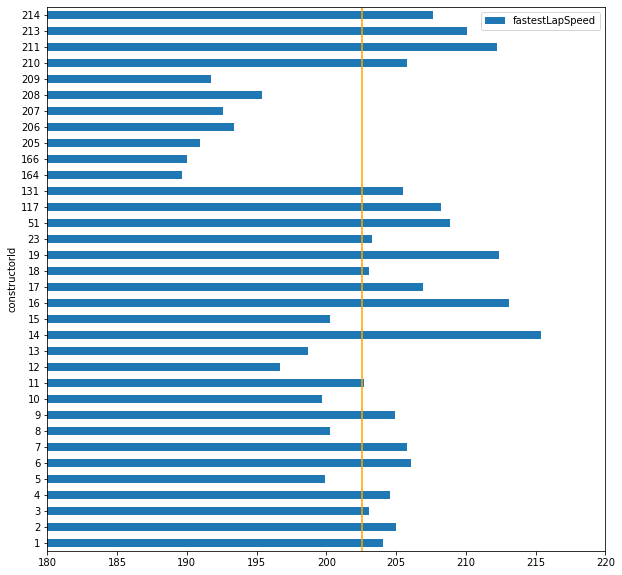

In [21]:
df.plot(kind='barh', y='fastestLapSpeed', x='constructorId', figsize=(10,10), xlim=(180, 220))
plt.vlines(mean_fastest_lap_speed, -1, 300, colors='orange')
plt.show()

# Mercedes (131) indeed is above average!

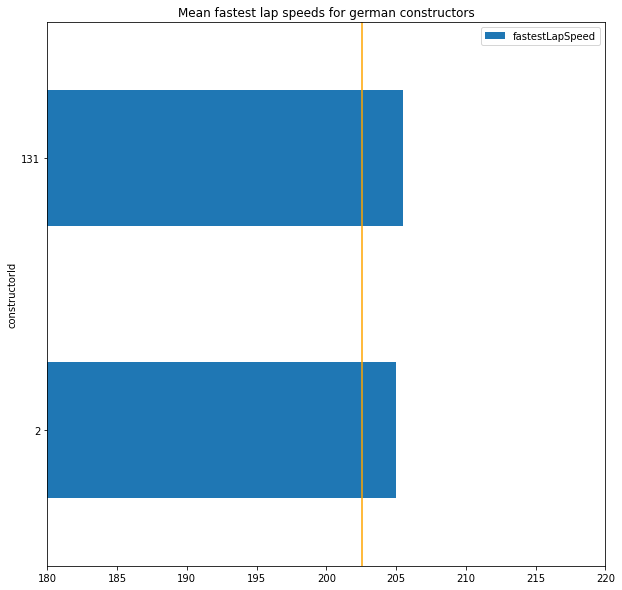

In [22]:
german_team_data = df[df['constructorId'].isin(german_constructor_ids)]

german_team_data.plot(kind='barh', y='fastestLapSpeed', x='constructorId', figsize=(10,10), xlim=(180, 220), title='Mean fastest lap speeds for german constructors')
plt.vlines(mean_fastest_lap_speed, -1, 300, colors=['orange'])
plt.show()